In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('D:\WERK\PYTHON\FREECODECAMP\DATASET\covid_19_indonesia_time_series_all.csv')

In [3]:
df.drop(['Location Level', 'City or Regency','Province', 'Continent', 'Island', 'Time Zone', 'Special Status', 'Total Cities', 'Total Districts', 'Total Urban Villages', 
         'Total Rural Villages', 'Area (km2)', 'Population', 'Population Density', 'Longitude', 'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million', 'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate', 'Growth Factor of New Cases',
       'Growth Factor of New Deaths'], axis = 1, inplace = True)

In [4]:
df.rename(columns={'Location ISO Code':'Location Code', 'Total Regencies':'Regencies'},inplace = True)

In [5]:
df.drop(['Regencies'], axis = 1, inplace = True)

In [6]:
df

,Date,Location Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Country
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Indonesia
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Indonesia
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Indonesia
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Indonesia
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Indonesia
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Indonesia
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Indonesia
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Indonesia


In [7]:
imputer = SimpleImputer(strategy = 'constant')
df2 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [9]:
df2

,Date,Location Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Country
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Indonesia
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Indonesia
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Indonesia
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Indonesia
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Indonesia
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Indonesia
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Indonesia
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Indonesia


In [10]:
locations = df2['Location'].unique()
len(locations)

35

Trend for each province

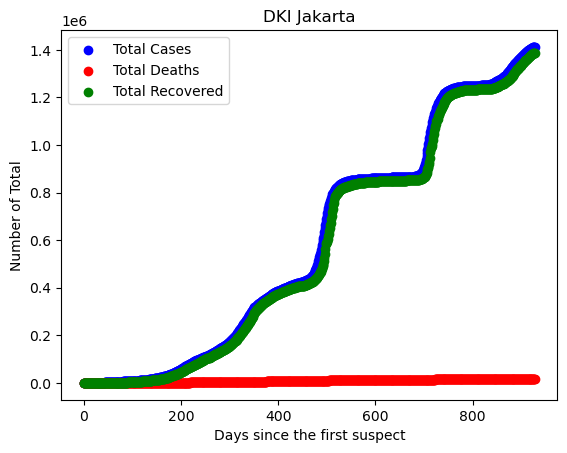

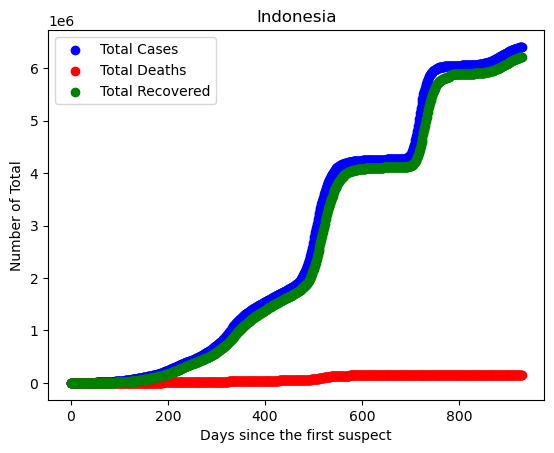

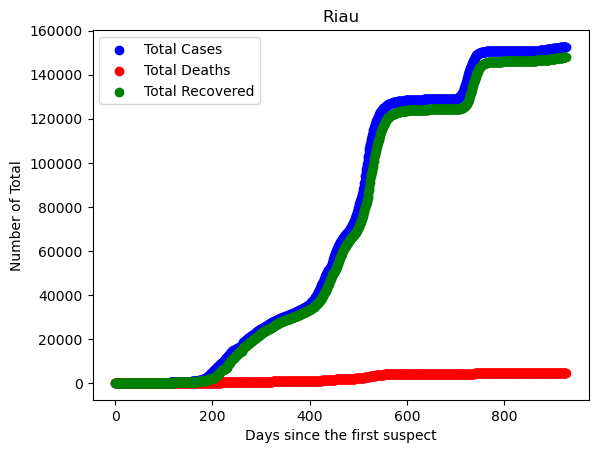

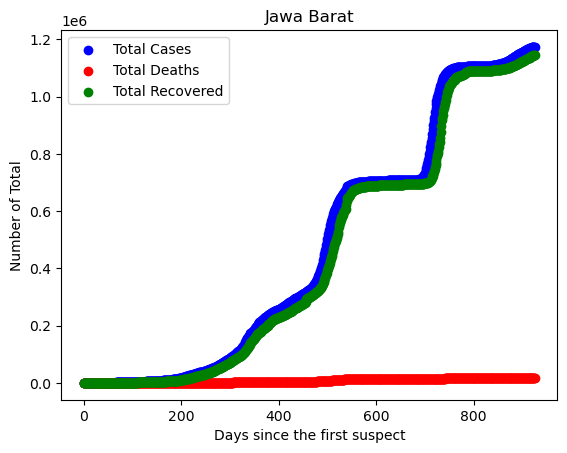

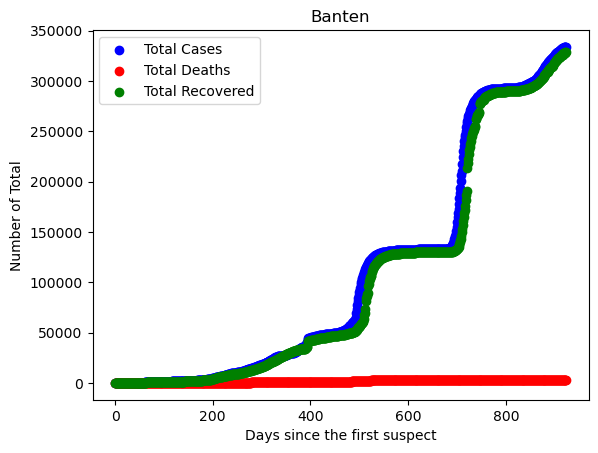

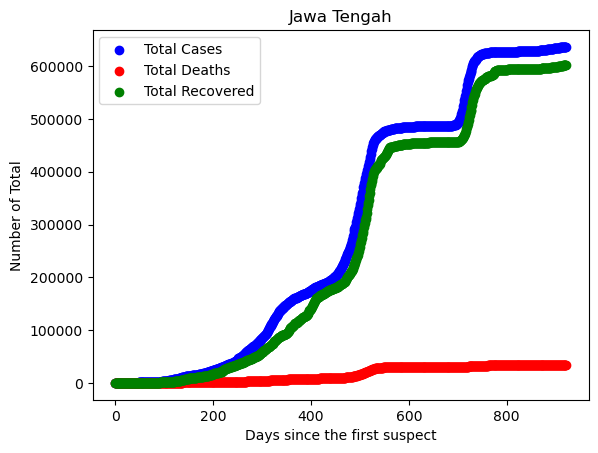

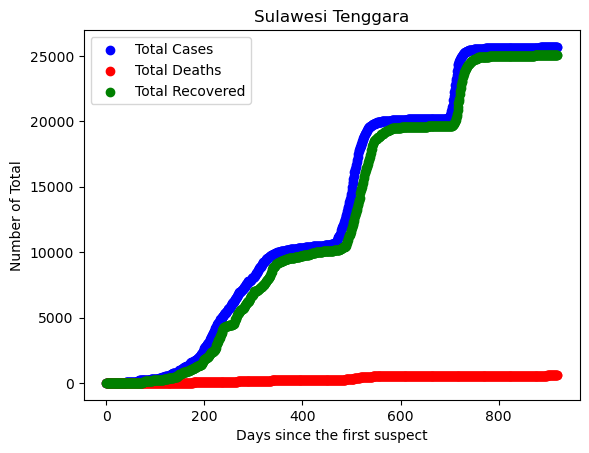

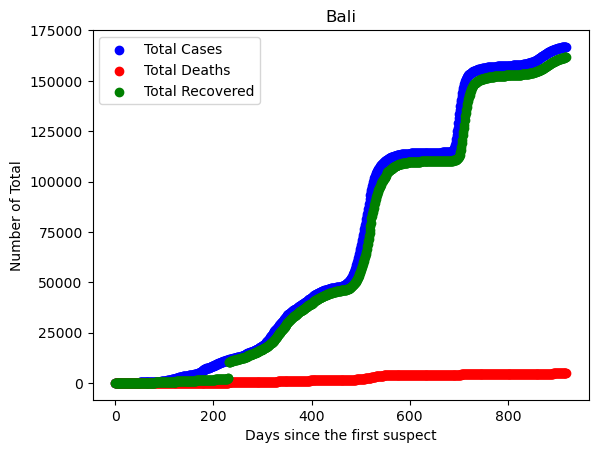

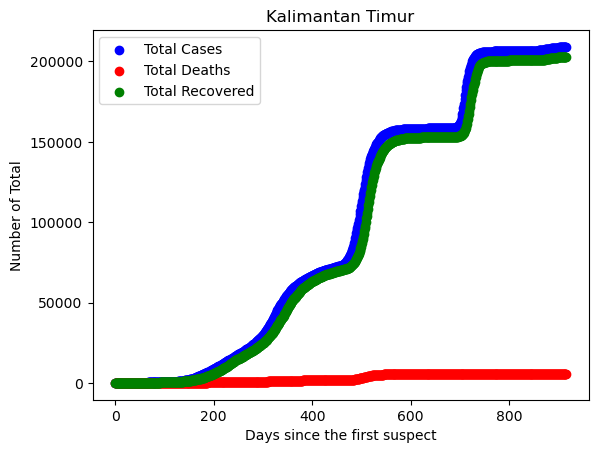

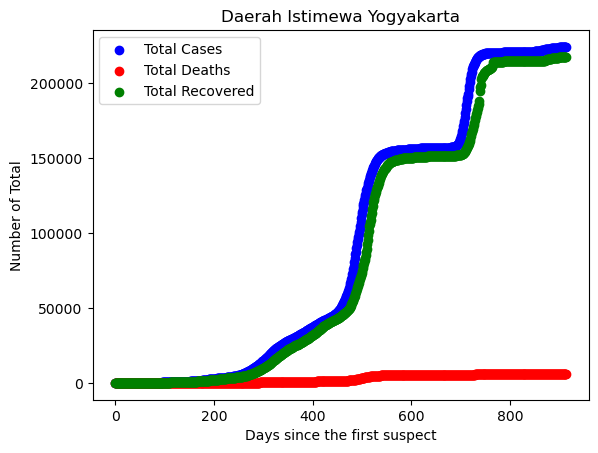

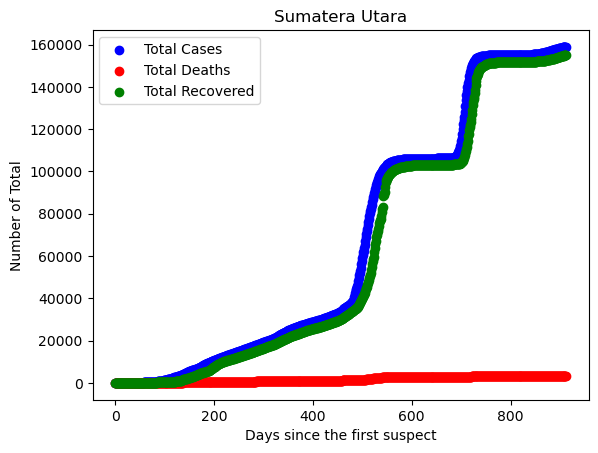

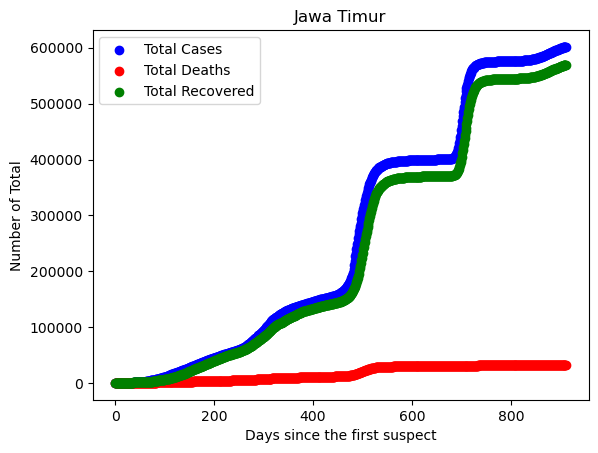

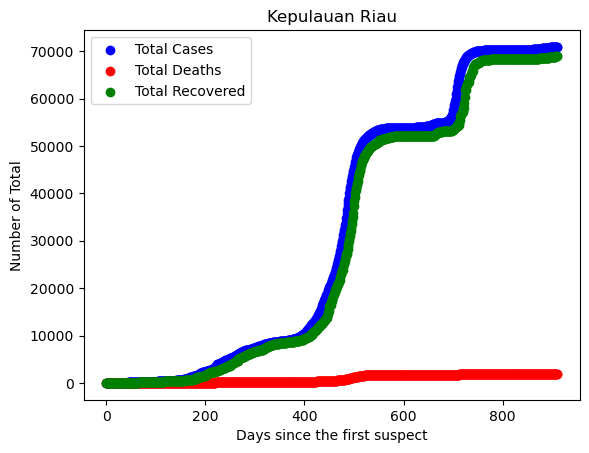

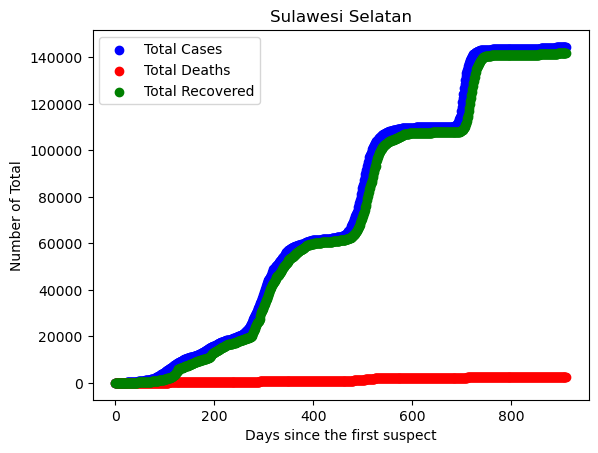

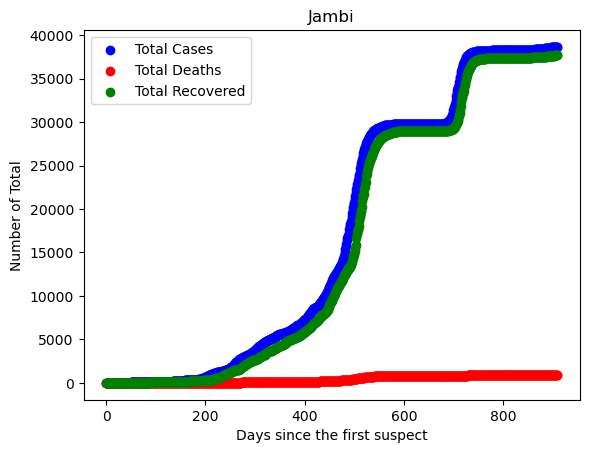

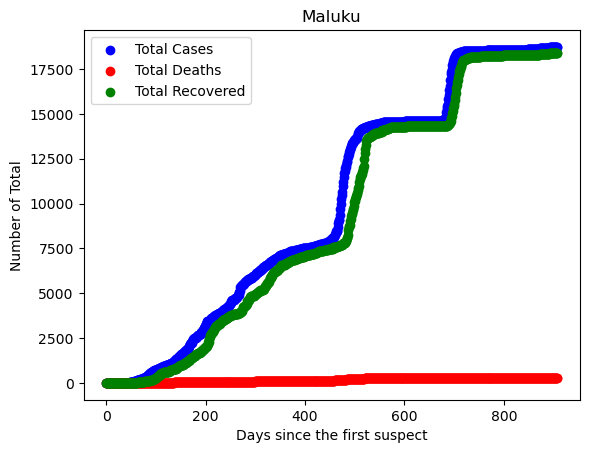

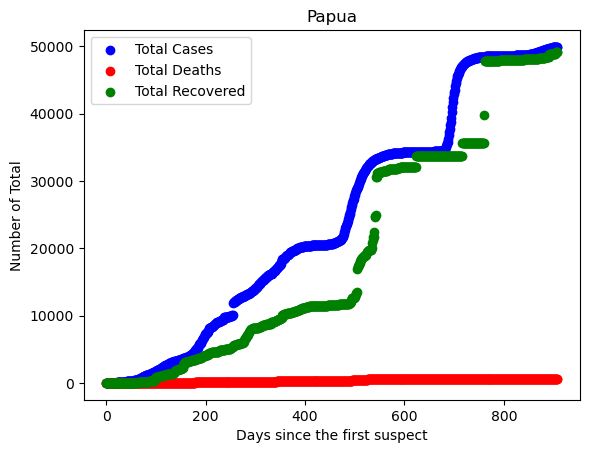

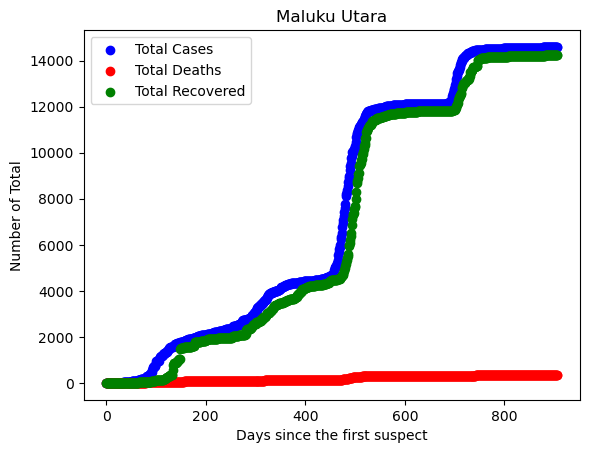

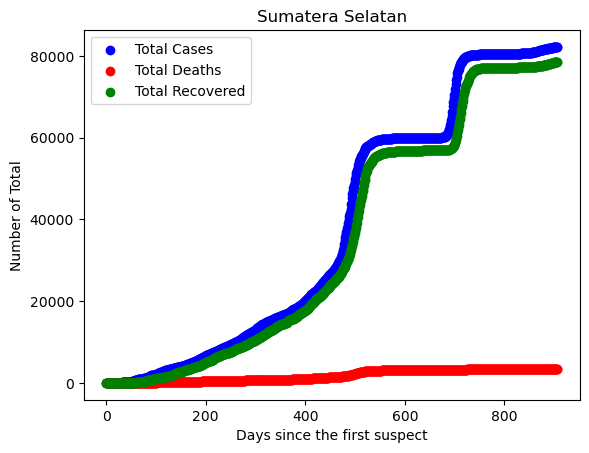

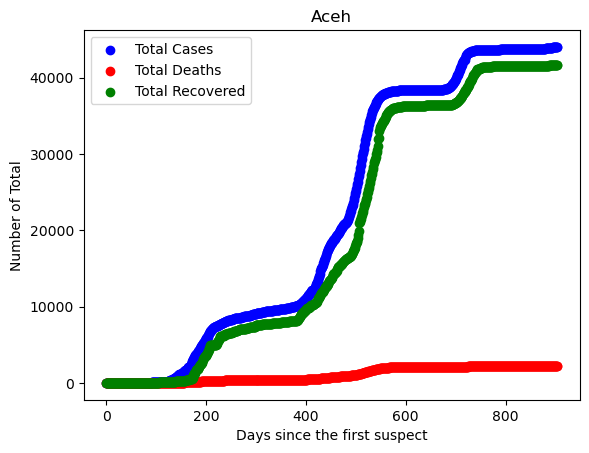

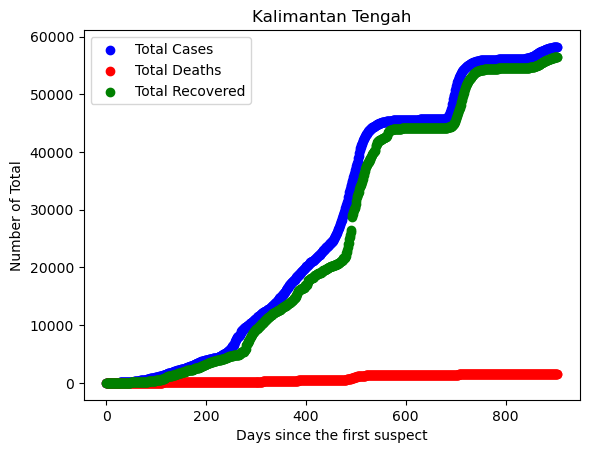

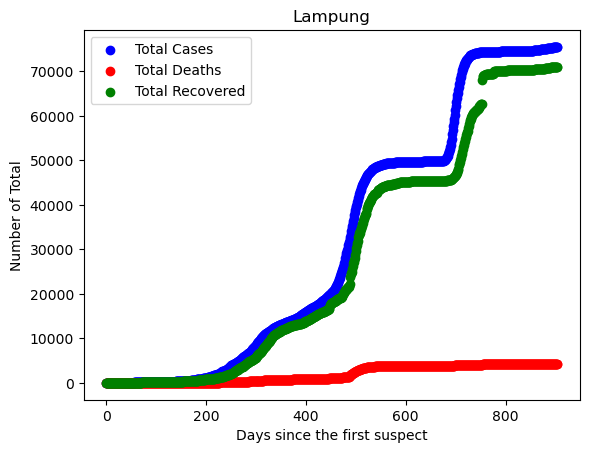

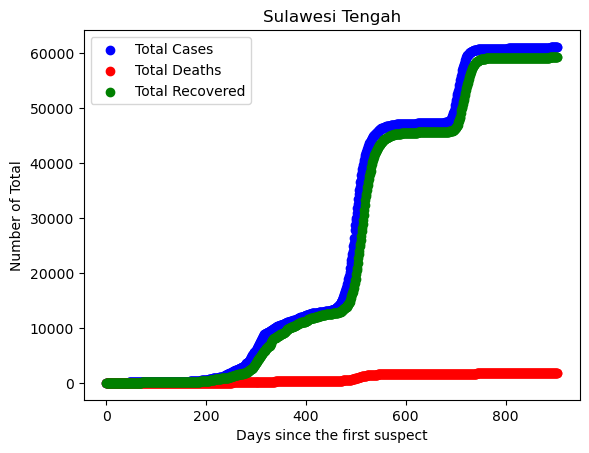

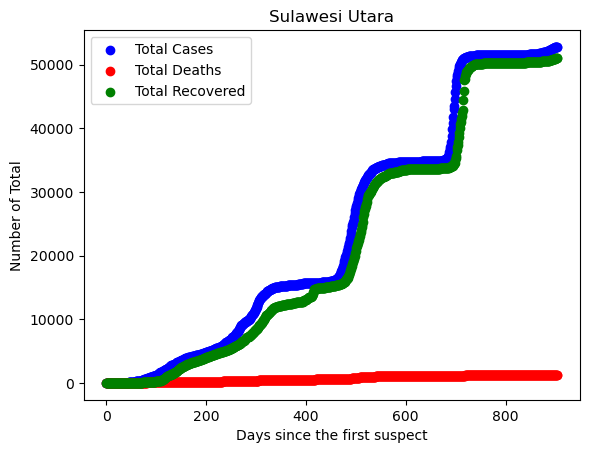

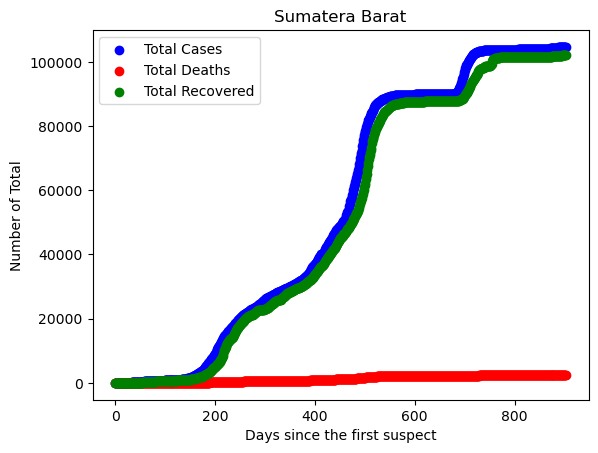

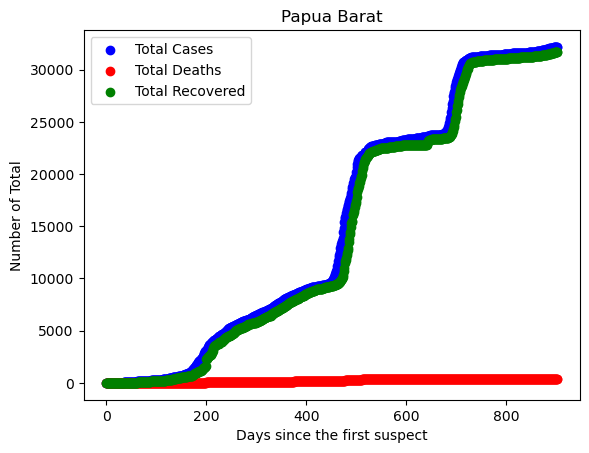

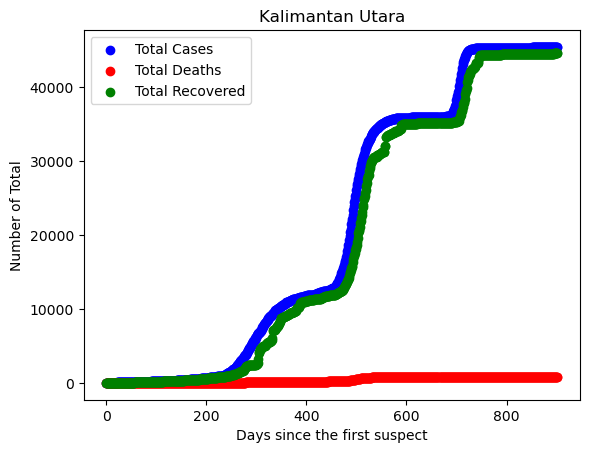

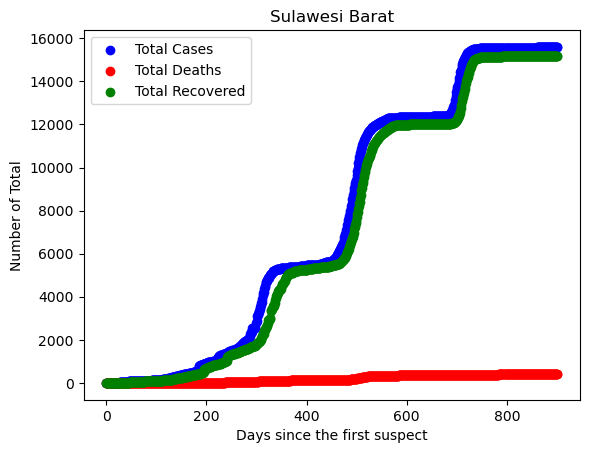

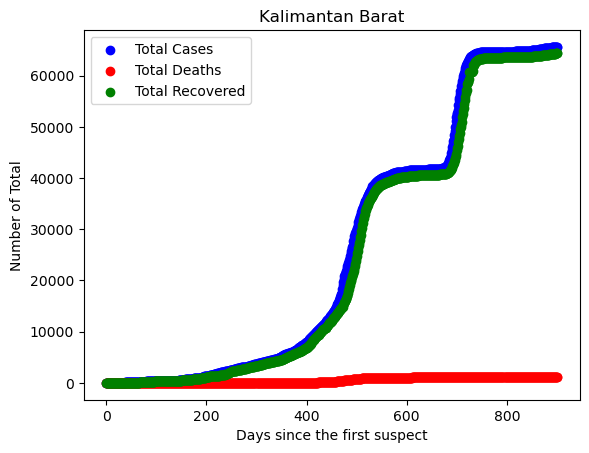

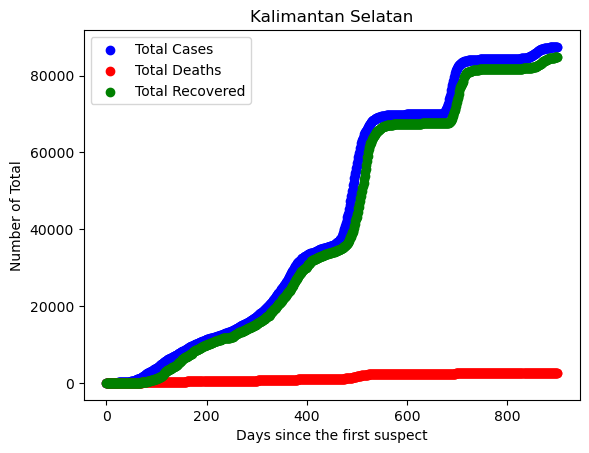

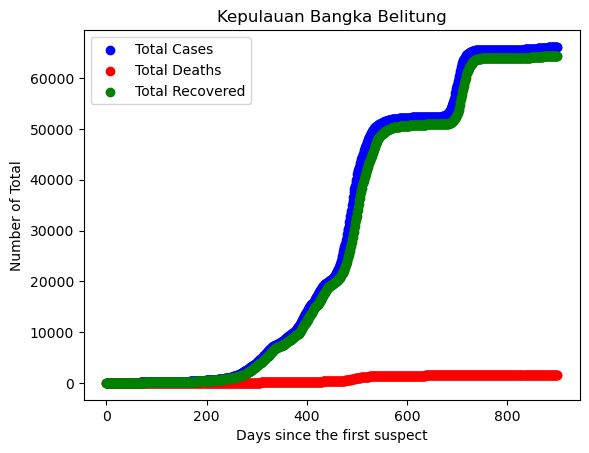

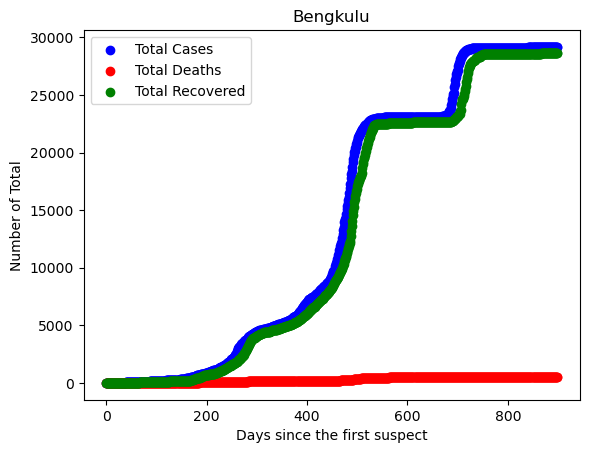

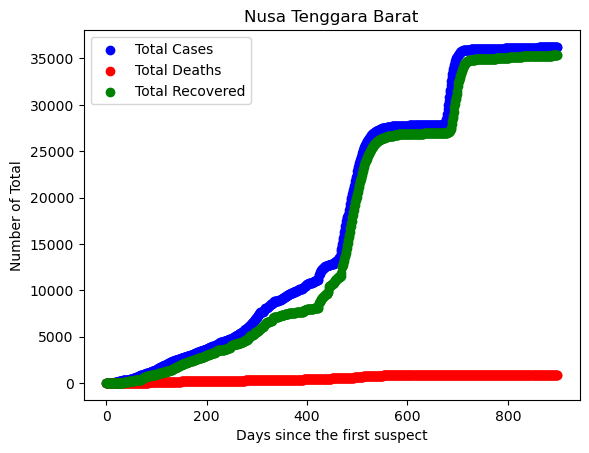

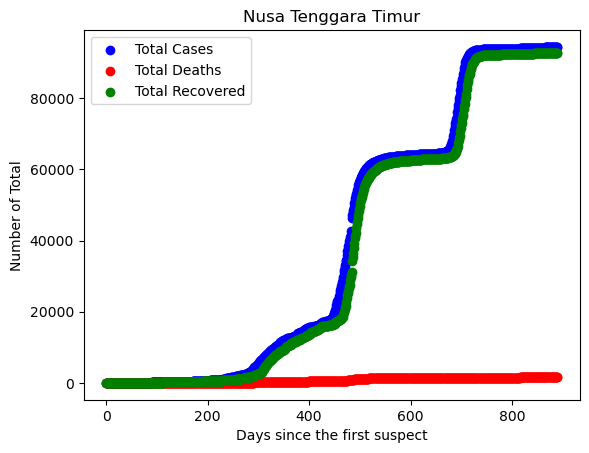

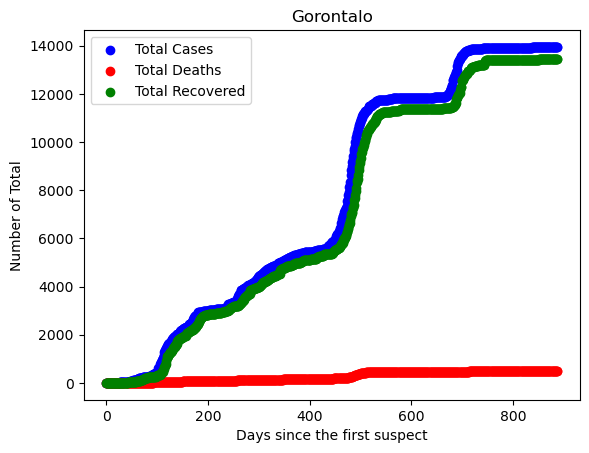

In [15]:
for idx in range(0, len(locations)):
    C = df2[df2['Location']==locations[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)), C['Total Cases'], color = 'blue', label = 'Total Cases')
    plt.scatter(np.arange(0,len(C)), C['Total Deaths'], color = 'red', label = 'Total Deaths')
    plt.scatter(np.arange(0,len(C)), C['Total Recovered'], color = 'green', label = 'Total Recovered')
    plt.title(locations[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of Total')
    plt.legend()
    plt.show()

Trend in Indonesia

In [18]:
df2['Date'] = pd.to_datetime(df['Date'])

In [19]:
df2

,Date,Location Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Country
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Indonesia
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Indonesia
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,Indonesia
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,Indonesia
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Indonesia
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Indonesia
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Indonesia
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Indonesia


In [20]:
df3 = df2.groupby(['Date'])[['Date', 'Total Cases', 'Total Deaths', 'Total Recovered']].sum().reset_index()

C:\Users\Aryo Sasi\AppData\Local\Temp\ipykernel_16488\467050336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df2.groupby(['Date'])[['Date', 'Total Cases', 'Total Deaths', 'Total Recovered']].sum().reset_index()


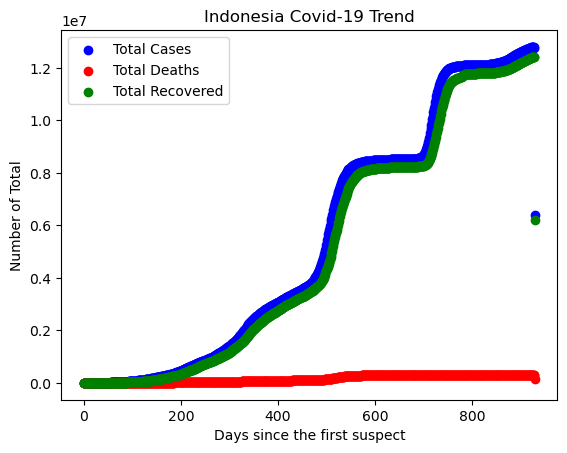

In [21]:
C = df3
plt.scatter(np.arange(0,len(C)), C['Total Cases'], color = 'blue', label = 'Total Cases')
plt.scatter(np.arange(0,len(C)), C['Total Deaths'], color = 'red', label = 'Total Deaths')
plt.scatter(np.arange(0,len(C)), C['Total Recovered'], color = 'green', label = 'Total Recovered')
plt.title('Indonesia Covid-19 Trend')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of Total')
plt.legend()
plt.show()